In [955]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [956]:
data_dir = 'dataset\\'
dir_files = os.listdir(data_dir)
dir_files = list(filter(lambda x: x.endswith(".csv"), dir_files))

for file in dir_files:
    dataset_head = pd.read_csv(data_dir + file)
    print(file)
    print(dataset_head.head(), "\n")

AEP_hourly.csv
              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

COMED_hourly.csv
              Datetime  COMED_MW
0  2011-12-31 01:00:00    9970.0
1  2011-12-31 02:00:00    9428.0
2  2011-12-31 03:00:00    9059.0
3  2011-12-31 04:00:00    8817.0
4  2011-12-31 05:00:00    8743.0 

DAYTON_hourly.csv
              Datetime  DAYTON_MW
0  2004-12-31 01:00:00     1596.0
1  2004-12-31 02:00:00     1517.0
2  2004-12-31 03:00:00     1486.0
3  2004-12-31 04:00:00     1469.0
4  2004-12-31 05:00:00     1472.0 

DEOK_hourly.csv
              Datetime  DEOK_MW
0  2012-12-31 01:00:00   2945.0
1  2012-12-31 02:00:00   2868.0
2  2012-12-31 03:00:00   2812.0
3  2012-12-31 04:00:00   2812.0
4  2012-12-31 05:00:00   2860.0 

DOM_hourly.csv
              Datetime  DOM_MW
0  2005-12-31 01:00:00  9389.0
1  2005-12-31 02:00:00  9070.0
2  2005-12-31 03:00:00  9001.0
3

In [957]:
pjm_hourly_est_dataset = pd.read_csv(data_dir + "pjm_hourly_est.csv")
pjm_hourly_est_dataset

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN


In [958]:
# lets examine one of the datasets

ds1 = pd.read_csv(data_dir + "PJME_hourly.csv")
ds1

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


In [959]:
ds1.dtypes

Datetime     object
PJME_MW     float64
dtype: object

In [960]:
ds1['Datetime'] = pd.to_datetime(ds1['Datetime'])

In [961]:
ds1.dtypes

Datetime    datetime64[ns]
PJME_MW            float64
dtype: object

In [962]:
# set index as 'Datetime' column
ds1.set_index('Datetime', inplace=True)
ds1

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [963]:
# checking duplicate datetimes
print("Unique Dates in our data: ", len(ds1.index.unique()))
print("Total Dates (including duplicates) in our data: ", len(ds1.index))

Unique Dates in our data:  145362
Total Dates (including duplicates) in our data:  145366


In [964]:
# dropping duplicate datetimes and corresponding rows
ds1 = ds1[~ds1.index.duplicated(keep='first')]
print("Unique Dates in our data: ", len(ds1.index.unique()))
print("Total Dates (including duplicates) in our data: ", len(ds1.index))

Unique Dates in our data:  145362
Total Dates (including duplicates) in our data:  145362


In [965]:
# checking missing datetimes
daterange = ds1.index.max() - ds1.index.min()
print("There must be", (daterange.days+1)*24, "index values, but we have only", len(ds1.index), "datetimes")
print("So, we will create", (daterange.days+1)*24-len(ds1.index), "missing indexes and interpolate their corresponding values")

There must be 145392 index values, but we have only 145362 datetimes
So, we will create 30 missing indexes and interpolate their corresponding values


In [966]:
# creating missing index values
new_index = pd.date_range(start = ds1.index.min(), end = ds1.index.max(), freq = 'H')
new_index

DatetimeIndex(['2002-01-01 01:00:00', '2002-01-01 02:00:00',
               '2002-01-01 03:00:00', '2002-01-01 04:00:00',
               '2002-01-01 05:00:00', '2002-01-01 06:00:00',
               '2002-01-01 07:00:00', '2002-01-01 08:00:00',
               '2002-01-01 09:00:00', '2002-01-01 10:00:00',
               ...
               '2018-08-02 15:00:00', '2018-08-02 16:00:00',
               '2018-08-02 17:00:00', '2018-08-02 18:00:00',
               '2018-08-02 19:00:00', '2018-08-02 20:00:00',
               '2018-08-02 21:00:00', '2018-08-02 22:00:00',
               '2018-08-02 23:00:00', '2018-08-03 00:00:00'],
              dtype='datetime64[ns]', length=145392, freq='H')

In [967]:
# assigning new indexes
ds1 = ds1.reindex(new_index, fill_value=np.nan)
ds1

,PJME_MW
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0
2018-08-02 23:00:00,38500.0


In [968]:
ds1['PJME_MW'].isna().sum()

30

In [969]:
# Interpolating NaN values.
ds1["PJME_MW"] = ds1["PJME_MW"].interpolate()

In [970]:
ds1['PJME_MW'].isna().sum()

0

<AxesSubplot:title={'center':'PJM East'}>

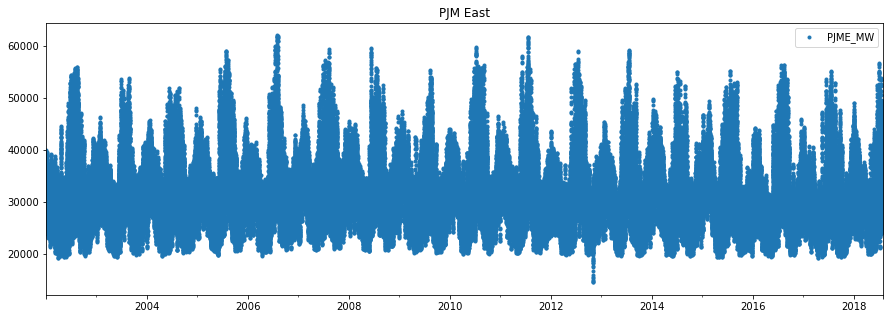

In [971]:
ds1.plot(style='.', figsize=(15,5), title='PJM East') # we want dot plots instead of lines. therefore we've used style='.'

C:\Users\kemal\miniconda3\envs\prophet\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
C:\Users\kemal\miniconda3\envs\prophet\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
C:\Users\kemal\miniconda3\envs\prophet\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
C:\Users\k

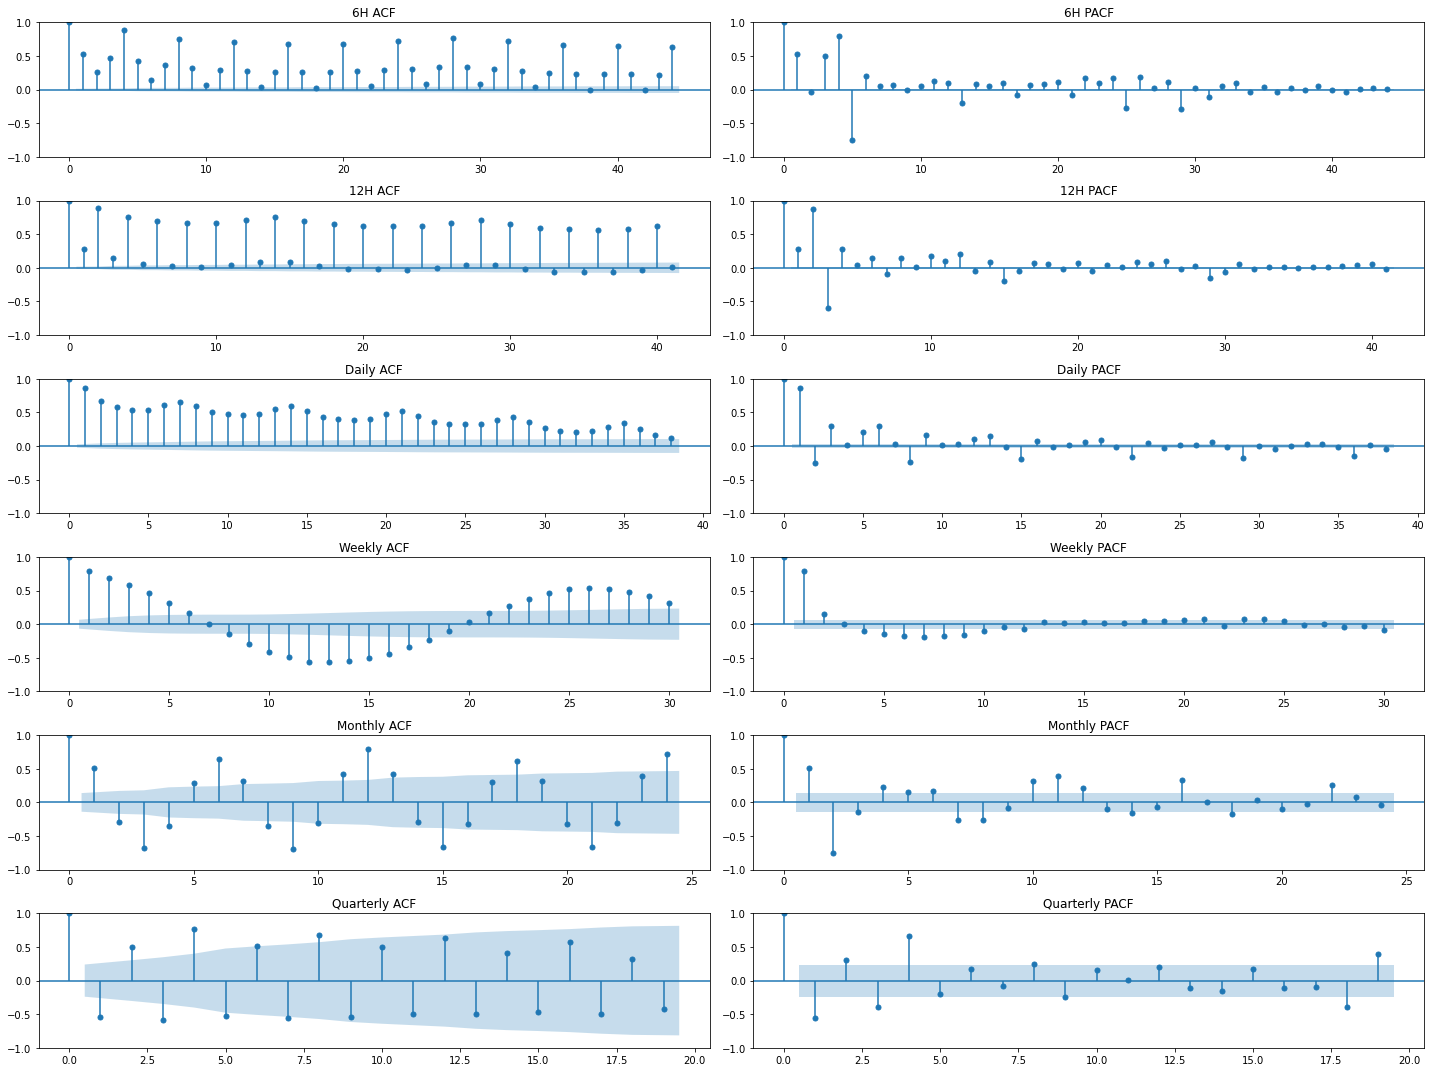

In [972]:
# Analyzing AutoCorrelation and Partial Autocorrelation of Mean Time Intervals

def correlation_time_intervals(df):
    '''
    This function takes in a dataframe and plots the autocorrelation and partial autocorrelation plots
    for the dataframe
    
    :param df: The dataframe that you want to plot the correlation time intervals for
    '''
    df = df.copy()
    df_6H = df.resample('6H').mean()
    df_12H = df.resample('12H').mean()
    df_daily = df.resample('D').mean()
    df_weekly = df.resample('W').mean()
    df_monthly = df.resample('M').mean()
    df_quarterly = df.resample('Q').mean()

    corr_list = [df_6H,
                 df_12H,
                 df_daily,
                 df_weekly,
                 df_monthly,
                 df_quarterly]

    corr_name = {'0': "6H", '1': "12H", '2': "Daily", '3': "Weekly", '4': "Monthly", '5': "Quarterly"}

    fig,axes = plt.subplots(nrows = 6, ncols = 2, figsize=(20,15))

    for x,y in enumerate(corr_list):
            plot_acf((y), ax = axes[x,0], title = corr_name[f'{x}'] + " ACF")
            plot_pacf((y), ax = axes[x,1], title = corr_name[f'{x}'] + " PACF")

    fig.tight_layout()

correlation_time_intervals(ds1)

In [973]:
# Analyzing how the trends are impacted by different time intervals

def create_time_intervals(df, label=None):
    '''
    Create a new pandas DataFrame with the following columns: hour, dayofweek, quarter, month, year,
    dayofyear, dayofmonth, weekofyear
    
    :param df: the pandas DataFrame you want to create time intervals for
    :param label: The name of the column in our dataset that contains the values we want to predict
    :return: two pandas DataFrame objects: x and y.
    '''
    # creating different time intervals with hourly data
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    # assigning these new columns to a new pandas Dataframe (x)
    x = df[['hour',
            'dayofweek',
            'quarter',
            'month',
            'year',
            'dayofyear',
            'dayofmonth',
            'weekofyear']]
    
    # if our dataset contains a column of values corresponding to the relevant time interval, we also want to assign that column to a new pandas Series (y)
    if label:
        y = df[label]
        return x, y
    
    return x

x, y = create_time_intervals(ds1, label='PJME_MW')

# concatenating the time intervals and label in a single dataframe
ds_target = pd.concat([x, y], axis=1) # axis = 1 for column-wise concatenation

C:\Users\kemal\miniconda3\envs\prophet\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [974]:
ds_target

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,PJME_MW
2002-01-01 01:00:00,1,1,1,1,2002,1,1,1,30393.0
2002-01-01 02:00:00,2,1,1,1,2002,1,1,1,29265.0
2002-01-01 03:00:00,3,1,1,1,2002,1,1,1,28357.0
2002-01-01 04:00:00,4,1,1,1,2002,1,1,1,27899.0
2002-01-01 05:00:00,5,1,1,1,2002,1,1,1,28057.0
...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,20,3,3,8,2018,214,2,31,44057.0
2018-08-02 21:00:00,21,3,3,8,2018,214,2,31,43256.0
2018-08-02 22:00:00,22,3,3,8,2018,214,2,31,41552.0
2018-08-02 23:00:00,23,3,3,8,2018,214,2,31,38500.0


In [975]:
ds_target.isna().sum()

hour          0
dayofweek     0
quarter       0
month         0
year          0
dayofyear     0
dayofmonth    0
weekofyear    0
PJME_MW       0
dtype: int64

Text(0.5, 0.98, 'Power Use MW by Hour, Day of Week, Year and Week of Year')

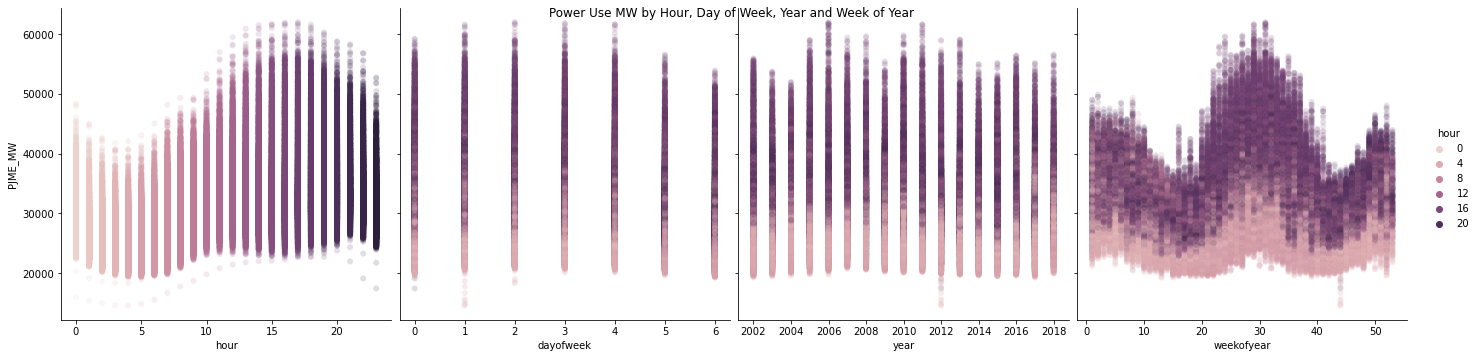

In [976]:
sns.pairplot(data = ds_target, 
             hue = 'hour', 
             x_vars = ['hour','dayofweek','year','weekofyear'], 
             y_vars = 'PJME_MW', 
             height = 5, 
             plot_kws = {'alpha':0.15, 'linewidth':0})

plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')

Text(0.5, 0.98, 'Power Use MW by Hour, Day of Week, Year and Week of Year')

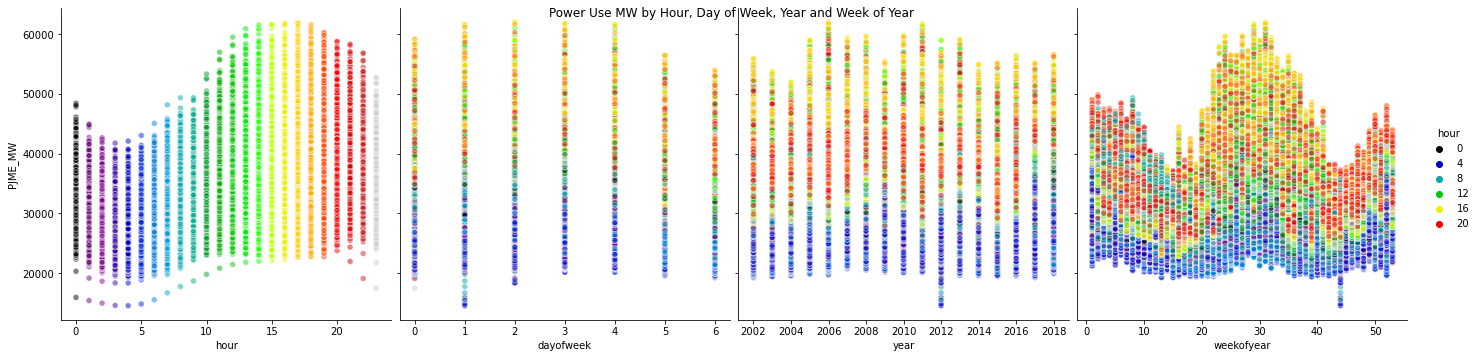

In [977]:
sns.pairplot(data = ds_target, 
             hue = 'hour', 
             palette = 'nipy_spectral',
             x_vars = ['hour','dayofweek','year','weekofyear'], 
             y_vars = 'PJME_MW', 
             height = 5, 
             plot_kws = {'alpha':0.5, 'linewidth':1})

plt.suptitle('Power Use MW by Hour, Day of Week, Year and Week of Year')

#### A strong seasonality can be observed in weekofyear and hour plots.

In [978]:
# Creating the model with daily data
# Train/Test Split

train_size = 0.8 # train_size portion in the dataset
ds_freq = 'D' # we'll use a frequency in which we are sure there is seasonality

ds_new = ds1.resample(ds_freq).mean()

ds_train = ds_new.iloc[:math.floor(len(ds_new)*train_size),:].copy() 
ds_test = ds_new.iloc[math.floor(len(ds_new)*train_size):,:].copy()

In [979]:
print("len(ds_new): ", len(ds_new))
print("len(ds_train): ", len(ds_train))
print("len(ds_test): ", len(ds_test))
print("len(ds_train + ds_test): ", len(ds_train + ds_test))

len(ds_new):  6059
len(ds_train):  4847
len(ds_test):  1212
len(ds_train + ds_test):  6059


<AxesSubplot:title={'center':'PJM East'}>

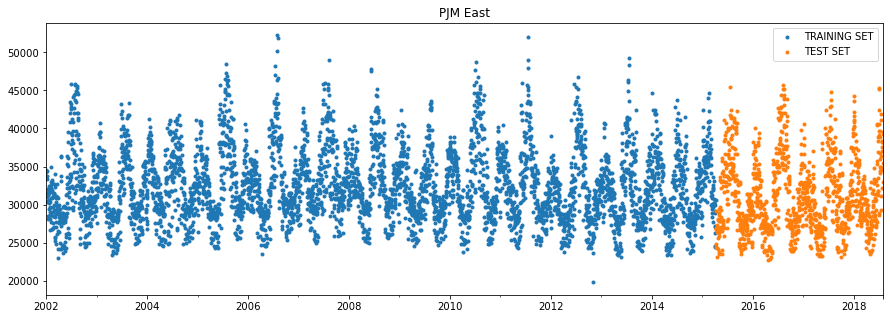

In [980]:
ds_train.rename(columns={'PJME_MW': 'TRAINING SET'}).join(ds_test.rename(columns={'PJME_MW': 'TEST SET'}),how='outer').plot(figsize=(15,5), title='PJM East', style='.')

In [981]:
# Prophet Model
# Format data for prophet model using ds and y
ds_train = ds_train.reset_index().rename(columns={'index':'ds','PJME_MW':'y'})
ds_train

,ds,y
0,2002-01-01,31080.739130
1,2002-01-02,34261.541667
2,2002-01-03,34511.875000
3,2002-01-04,33715.458333
4,2002-01-05,30405.125000
...,...,...
4842,2015-04-05,24577.500000
4843,2015-04-06,26996.666667
4844,2015-04-07,27177.833333
4845,2015-04-08,29136.041667


In [982]:
model = Prophet()
model.fit(ds_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [983]:
# forecasting periods of len(ds_test)
# prophet requires a blank dataframe to input predictions

future = model.make_future_dataframe(periods=len(ds_test), freq=ds_freq) 
future

,ds
0,2002-01-01
1,2002-01-02
2,2002-01-03
3,2002-01-04
4,2002-01-05
...,...
6054,2018-07-30
6055,2018-07-31
6056,2018-08-01
6057,2018-08-02


In [984]:
forecast = model.predict(future)

In [985]:
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [986]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2002-01-01,32178.467088,28586.946972,35518.372631
1,2002-01-02,32298.969224,28510.854263,35916.978955
2,2002-01-03,32212.352732,28624.426725,35830.975302
3,2002-01-04,31863.557901,28339.053766,35423.111831
4,2002-01-05,29407.792502,25750.266262,32902.174020
...,...,...,...,...
6054,2018-07-30,39362.463271,35172.866334,43635.116316
6055,2018-07-31,39863.163269,35947.919259,43948.353561
6056,2018-08-01,39798.984260,35598.446839,43928.778252
6057,2018-08-02,39502.928623,35454.853570,43304.047480


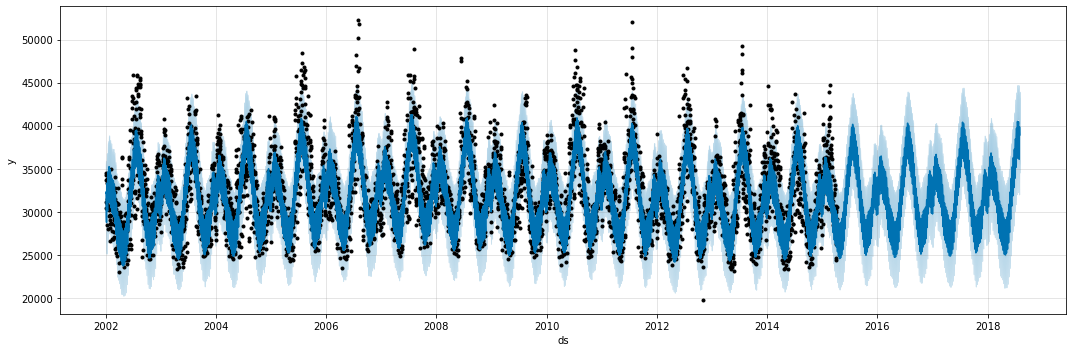

In [987]:
model.plot(forecast, figsize=(15,5));

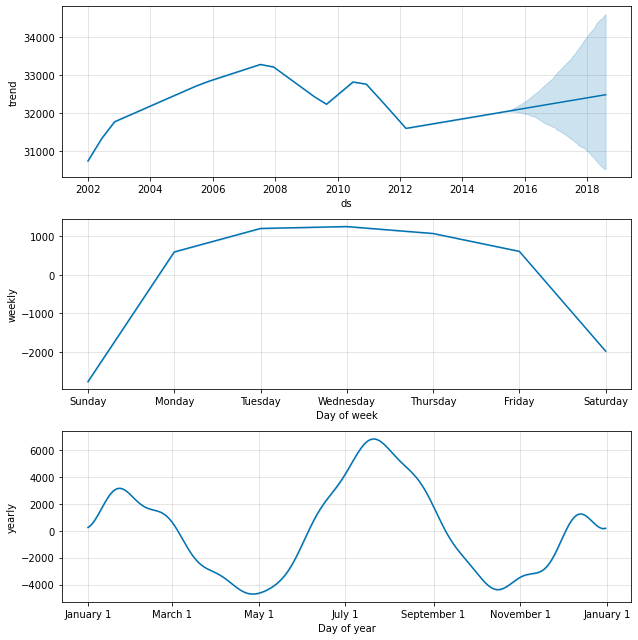

In [988]:
# plot individual components of forecast: trend, weekly/yearly seasonality,
model.plot_components(forecast);

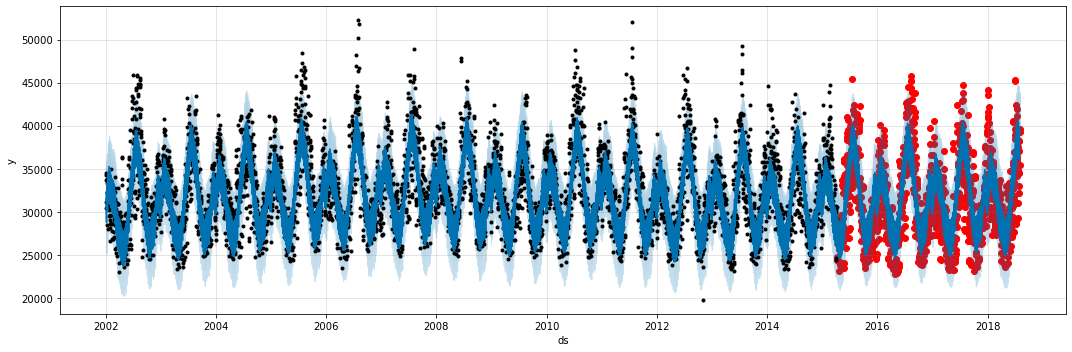

In [989]:
# compare forecast results with actual data
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ds_test.index, ds_test['PJME_MW'], color='r')
fig = model.plot(forecast, ax=ax)

In [990]:
# accuracy calculation for train set

print("mean_squared_error: ", mean_squared_error(y_true=ds_train['y'],y_pred=forecast['yhat'].iloc[:len(ds_train)]))
print("mean_absolute_error: ", mean_absolute_error(y_true=ds_train['y'],y_pred=forecast['yhat'].iloc[:len(ds_train)]))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_true=ds_train['y'],y_pred=forecast['yhat'].iloc[:len(ds_train)]))

mean_squared_error:  7749820.09153277
mean_absolute_error:  2053.8122865896826
mean_absolute_percentage_error:  0.06187055620373418


In [991]:
# accuracy calculation for test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

print("mean_squared_error: ", mean_squared_error(y_true=ds_test['PJME_MW'],y_pred=forecast['yhat'].iloc[-len(ds_test):]))
print("mean_absolute_error: ", mean_absolute_error(y_true=ds_test['PJME_MW'],y_pred=forecast['yhat'].iloc[-len(ds_test):]))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_true=ds_test['PJME_MW'],y_pred=forecast['yhat'].iloc[-len(ds_test):]))

mean_squared_error:  11529632.46497967
mean_absolute_error:  2767.451443989742
mean_absolute_percentage_error:  0.09002184998806927


In [992]:
# Adding logistic growth limits

cap_value = 50000
floor_value = 23000

ds_train['cap'] = cap_value
ds_train['floor'] = floor_value
future['cap'] = cap_value
future['floor'] = floor_value

In [993]:
model_holidays = Prophet(
                        growth='logistic',
                        yearly_seasonality=False
                        ).add_seasonality(
                            name = "yearly",
                            period = 365.25,
                            fourier_order = 7
                        )

In [994]:
# Adding Holidays
model_holidays.add_country_holidays(country_name='US')

In [995]:
model_holidays.fit(ds_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [996]:
model_holidays.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10      New Year's Day (Observed)
11    Independence Day (Observed)
12       Christmas Day (Observed)
13        Veterans Day (Observed)
dtype: object

In [997]:
forecast = model_holidays.predict(future)

In [998]:
print(forecast.columns)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

Index(['ds', 'trend', 'cap', 'floor', 'yhat_lower', 'yhat_upper',
       'trend_lower', 'trend_upper', 'Christmas Day', 'Christmas Day_lower',
       'Christmas Day_upper', 'Christmas Day (Observed)',
       'Christmas Day (Observed)_lower', 'Christmas Day (Observed)_upper',
       'Columbus Day', 'Columbus Day_lower', 'Columbus Day_upper',
       'Independence Day', 'Independence Day_lower', 'Independence Day_upper',
       'Independence Day (Observed)', 'Independence Day (Observed)_lower',
       'Independence Day (Observed)_upper', 'Labor Day', 'Labor Day_lower',
       'Labor Day_upper', 'Martin Luther King Jr. Day',
       'Martin Luther King Jr. Day_lower', 'Martin Luther King Jr. Day_upper',
       'Memorial Day', 'Memorial Day_lower', 'Memorial Day_upper',
       'New Year's Day', 'New Year's Day_lower', 'New Year's Day_upper',
       'New Year's Day (Observed)', 'New Year's Day (Observed)_lower',
       'New Year's Day (Observed)_upper', 'Thanksgiving', 'Thanksgiving_lower',
 

,ds,yhat,yhat_lower,yhat_upper
0,2002-01-01,30532.193737,27024.512524,34164.270756
1,2002-01-02,34558.406094,30875.875479,38025.763724
2,2002-01-03,34500.836779,30917.027563,38292.077822
3,2002-01-04,33987.373893,30151.506962,37449.796923
4,2002-01-05,31407.981021,27737.668545,35185.980021
...,...,...,...,...
6054,2018-07-30,38036.688395,34553.196558,41871.880836
6055,2018-07-31,38465.096980,34826.081581,42038.185592
6056,2018-08-01,38446.157864,34860.480773,42057.251494
6057,2018-08-02,38288.679421,34789.640119,41824.970773


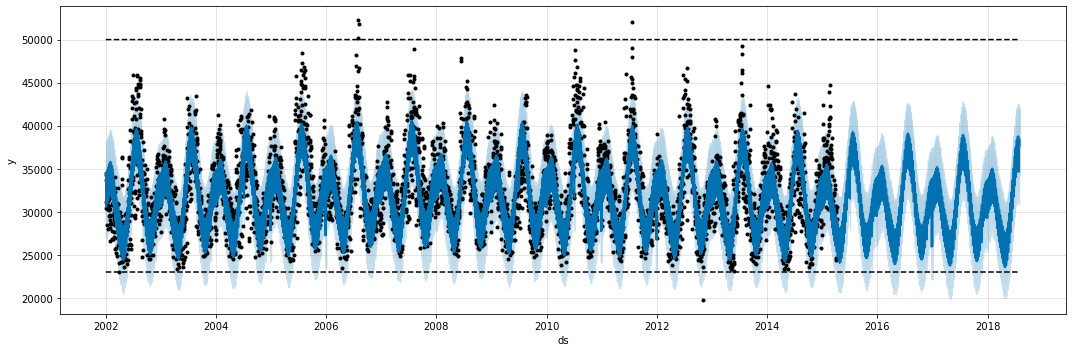

In [999]:
model_holidays.plot(forecast, figsize=(15,5));

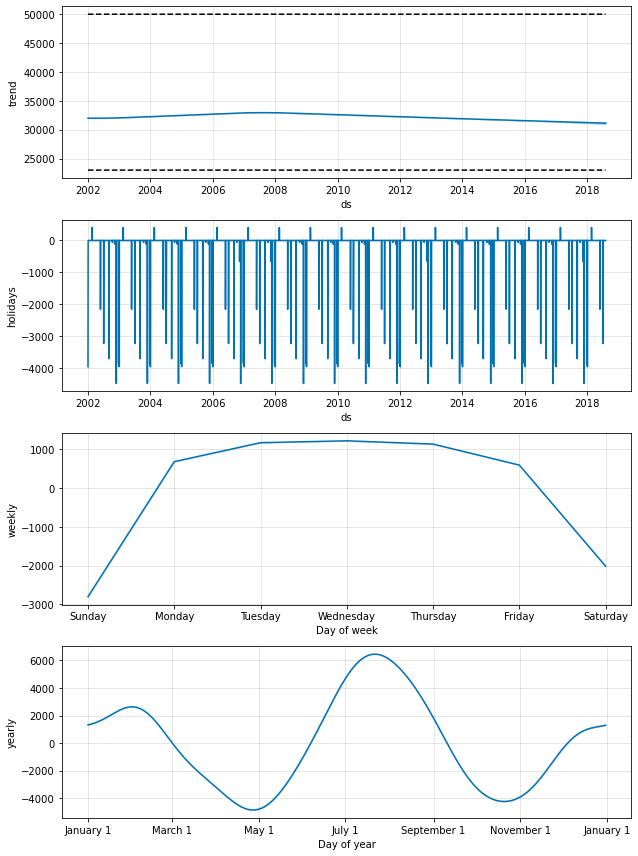

In [1000]:
# plot individual components of forecast: trend, weekly/yearly seasonality,
model_holidays.plot_components(forecast);

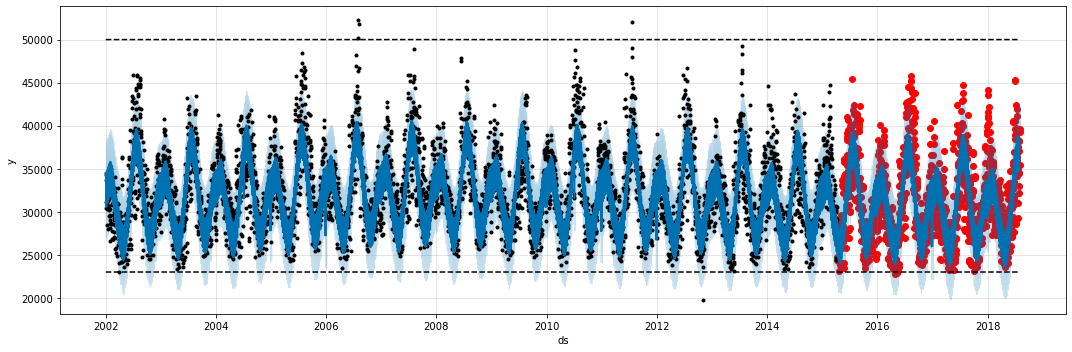

In [1001]:
# compare forecast results with actual data
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ds_test.index, ds_test['PJME_MW'], color='r')
fig = model_holidays.plot(forecast, ax=ax)

In [1002]:
# accuracy calculation for train set

print("mean_squared_error: ", mean_squared_error(y_true=ds_train['y'],y_pred=forecast['yhat'].iloc[:len(ds_train)]))
print("mean_absolute_error: ", mean_absolute_error(y_true=ds_train['y'],y_pred=forecast['yhat'].iloc[:len(ds_train)]))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_true=ds_train['y'],y_pred=forecast['yhat'].iloc[:len(ds_train)]))

mean_squared_error:  7842165.423585623
mean_absolute_error:  2075.5302262011637
mean_absolute_percentage_error:  0.06248899135531973


In [1003]:
# accuracy calculation for test set

print("mean_squared_error: ", mean_squared_error(y_true=ds_test['PJME_MW'],y_pred=forecast['yhat'].iloc[-len(ds_test):]))
print("mean_absolute_error: ", mean_absolute_error(y_true=ds_test['PJME_MW'],y_pred=forecast['yhat'].iloc[-len(ds_test):]))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_true=ds_test['PJME_MW'],y_pred=forecast['yhat'].iloc[-len(ds_test):]))

mean_squared_error:  9842018.887252042
mean_absolute_error:  2430.0239197738383
mean_absolute_percentage_error:  0.07671848026907642
